# Biopython

## General

In [27]:
####################################################################################
###   General   ####################################################################
####################################################################################


import Bio; from Bio.Seq import Seq; from Bio.SeqUtils import GC; from Bio.SeqUtils import MeltingTemp as mt

# Methods and attributes:
dir(Bio)
dir(Seq)

print(Bio.__version__)

# Make a special 'sequence' object
s1 = Seq("GGCAT")
print( f"Sequence: { s1 }" )
# Information about sequences
print( f" - GC content: { GC(s1) }" )
print( f" - Complement: { s1.complement() }" )
print( f" - Reverse complement: { s1.reverse_complement() }" )
print( f" - Change T>U: { s1.transcribe() }" )
print( f" - Change U>T: { s1.back_transcribe() }" )
print( f""" - Translate: { s1.translate(
	stop_symbol= '@'
) }""" )
print( f" - Melting temperature (Wallace): Tm = { mt.Tm_Wallace(s1) }" )
print( f" - Melting temperature (GC): Tm = { mt.Tm_GC(s1) }" )


# 1- and 3-letter codes transitioning
from Bio.SeqUtils import seq1, seq3
seq3('MDE') # 1 -> 3 letter code
seq1('MetAspGlu') # 3 -> 1 letter code

# view codon table
from Bio.Data import CodonTable
# dir(CodonTable)
# print(CodonTable.unambiguous_dna_by_name['Standard'])
# print(CodonTable.unambiguous_rna_by_name['Standard'])

# Levenshtein distance
from Levenshtein import distance
s2 = Seq("GATCATAC")
distance(s1, s2) 


1.79
Sequence: GGCAT
 - GC content: 60.0
 - Complement: CCGTA
 - Reverse complement: ATGCC
 - Change T>U: GGCAU
 - Change U>T: GGCAT
 - Translate: G
 - Melting temperature (Wallace): Tm = 16.0
 - Melting temperature (GC): Tm = -35.745107734584835


4

## Alignments

Global alignment:
CCC---DADBADGADGSDG
      ||||   |   | 
---XXXDADB---A---D-
  Score=6

Max similarity
CCC---DADBADGADGSDG
      ||||||       
---XXXDADBAD-------
  Score=9.5


Local alignment:
Alignment(seqA='CCCDADBADGADGSDG', seqB='XXXDADB---A---D-', score=6.0, start=3, end=15)
4 DADBADGADGSD
  ||||   |   |
4 DADB---A---D
  Score=6

Max similarity
4 DADBAD
  ||||||
4 DADBAD
  Score=12



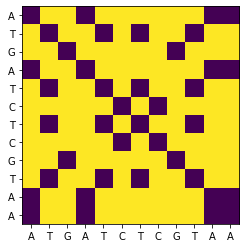

In [2]:
####################################################################################
###   Alignments   #################################################################
####################################################################################

from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq
from colorama import Fore, Style

sequence1 = Seq("CCCDADBADGADGSDG")
sequence2 = Seq("XXXDADBAD")

# Global Alignment
print(f"{Fore.GREEN}Global alignment:{Style.RESET_ALL}")
alignments = pairwise2.align.globalxx(sequence1, sequence2)
print(format_alignment(*alignments[0]))

## to view all alignments:
# for a in alignments:
# 	print(format_alignment(*a))

## Get alignment by the score only:
# alignment2 = pairwise2.align.globalxx(sequence1, sequence2, one_alignment_only=True, score_only=True)
# alignment2 / len(seq1) * 100

# Max similarity
print("Max similarity")
glb_alignment_ms = pairwise2.align.globalms(sequence1, sequence2, 2, -1, -0.5, -0.1)
for a in glb_alignment_ms:
	print(format_alignment(*a))

# Local Alignment
print(f"\n{Fore.GREEN}Local alignment:{Style.RESET_ALL}")
loc_alignments = pairwise2.align.localxx(sequence1, sequence2)
print(loc_alignments[0])
print(format_alignment(*loc_alignments[0]))
# Max similarity
print("Max similarity")
local_alignment_ms = pairwise2.align.localms(sequence1, sequence2, 2, -1, -0.5, -0.1)
for a in local_alignment_ms:
	print(format_alignment(*a))

###############################################################################
###   Using dotplot to check two sequences for similarity   ###################
###############################################################################

from Bio.Seq import Seq
import matplotlib.pyplot as plt
import numpy as np


def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)



def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

seq1 = Seq("ACTTAG")
seq2 = Seq("ACTT")
# dotplot(seq1, seq2)

def dotplotx(seq1, seq2):
    plt.imshow(np.array(makeMatrix(seq1, seq2, 1)))
    xt = plt.xticks(np.arange(len(list(seq1))), list(seq1))
    yt = plt.yticks(np.arange(len(list(seq1))), list(seq1))
    plt.show()
# dotplotx(seq1, seq2)

dna1 = Seq("ATGATCTCGTAA")
dna2 = Seq("ATTATGTCGTAA")
dotplotx(dna1, dna1)

In [3]:
####################################################################################
###   Read biological formats (.fasta, .gb)   ######################################
####################################################################################

from Bio import SeqIO

# loading FASTA
for record in SeqIO.parse("Examples/sequence.fasta", "fasta"):
	# print(record.id)
	# print(record.description)
	print(record)
	pass

# reading sequences in FASTA
# dna_record = SeqIO.read("Examples/sequence.fasta", "fasta")
# dna_seq = dna_record.seq


# Read GenBank
for record in SeqIO.parse("Examples/sequence.gb", "genbank"):
	print(record)

ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')
ID: MN908947.3
Name: MN908947
Description: Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 23
/molecule_type=ss-RNA
/topology=linear
/data_file_division=VRL
/date=18-MAR-2020
/accessions=['MN908947']
/sequence_version=3
/keywords=['']
/source=Severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2)
/organism=Severe acute respiratory syndrome coronavirus 2
/taxonomy=['Viruses', 'Riboviria', 'Orthornavirae', 'Pisuviricota', 'Pisoniviricetes', 'Nidovirales', 'Cornidovirineae', 'Coronaviridae', 'Orthocoronavirinae', 'Betacoronavirus', 'Sarbecovirus']
/references=[Reference(title='A new coronavirus associated with human respiratory disease in China', ...), Reference(title='Direct Submission', ...)]
/commen

## Visualise 3D structures

In [1]:
####################################################################################
###   Visualise 3D structures   ####################################################
####################################################################################
"""
Packages to visualise 3D structures:
- nglview
- py3Dmol
- pytraj
"""



# Reading pdb file for 3d structure
from Bio.PDB import PDBParser, MMCIFParser

# creating a parser
parser = PDBParser()
structure = parser.get_structure("6LU7", "Examples/6lu7.pdb") 
# can use the same command as the above one but for format MMCIF

structure

# models in the structure
model = structure[0]

# structure => model => chain => residue => atom => residue

# check for chains
# for chain in model:
# 	print(f"Chain {chain}, Chain_ID {chain.id}")

# Check for residue
# for chain in model:
# 	for residue in chain:
# 		print(residue)

# check for atoms
# for chain in model:
# 	print(f"Chain {chain}, Chain_ID{chain.id}")
# 	for residue in chain:
# 		for atom in residue:
# 			print(atom)

##############################################################################
###   Method1. py3Dmol   #####################################################
##############################################################################

import py3Dmol 

view1 = py3Dmol.view(query='pdb:6LU7')
view1.setStyle({'cartoon':{'color':'spectrum'}})

C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  warnings.warn(


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [5]:
####################################################################################
###   Method2. nglview   #################################################################
####################################################################################

import nglview as nv

# nv.demo()

from Bio.PDB import PDBParser, MMCIFParser

# creating a parser
parser = PDBParser()
structure = parser.get_structure("6LU7", "Examples/6lu7.pdb") 

view = nv.show_biopython(structure)
view

# option if you just want an image:
# view.render_image()


C:\Users\evgen\AppData\Local\Programs\Python\Python39\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2811.
  warnings.warn(


NGLWidget()

In [ ]:
# Read .pdb file, make an enantiomer (just a mirror image) by multiplying each of X, Y, and Z coordinates by -1, and then save the pdb file

"""Original file - view"""
from Bio.PDB import *
import nglview as nv

parser = PDBParser(PERMISSIVE=1)
structure = parser.get_structure("Helix", "helix (2).pdb")
view = nv.show_biopython(structure)
view



"""Change coordinates and then save the file"""
from Bio.PDB import *
import nglview as nv

parser = PDBParser(PERMISSIVE=1)
structure = parser.get_structure("Helix", "helix (2).pdb")
view = nv.show_biopython(structure)
# view
for model in structure:
	for chain in model:
		for residue in chain:
			for atom in residue:
				# print(atom.get_coord())
				# print(atom.get_vector())
				atom.set_coord(atom.get_coord() * -1)
				# print(atom.get_coord())
view = nv.show_biopython(structure); view

io = PDBIO()
io.set_structure(structure)
io.save('new_structure.pdb')


## BLAST

In [ ]:
####################################################################################
###   BLAST   ######################################################################
####################################################################################

from Bio.Blast import NCBIWWW

result_handle = NCBIWWW.qblast("blastn", "nt", 'MT747438')


# save the result in a file
with open("blast_BE_isolate.xml", "w+") as save_to:
	save_to.write(result_handle.read())
	result_handle.close()

# look at the BLAST results
from Bio.Blast import NCBIXML

result_handle = open("blast_BE_isolate.xml", "r")
blast_record = NCBIXML.read(result_handle)

E_VALUE_THRESH = 0.0001
ct = 0
for alignment in blast_record.alignments:
	for hsp in alignment.hsps:
		ct += 1
		if hsp.expect < E_VALUE_THRESH:
			print("\n")
			print("****Alignment****")
			print("sequence:", alignment.title)
			print("lenght:", alignment.length)
			print("E value:", hsp.expect)
			print(hsp.query[0:75] + '...')
			print(hsp.match[0:75] + '...')
			print(hsp.sbjct[0:75] + '...')

print("\n" + "There are ",ct,"sequences in the BLAST output!")

"""
with NCBIWWW.qblast("blastn", "nt", 'rcsb_pdb_7ACT.fasta') as result_handle:
	with open("result_blast_covid.xml", "w") as xml_file:
		xml_file.write(result_handle)

with open("result_covid_blast.xml", "w") as f:
	for i in result_handle:
		f.write(i)
"""

In [ ]:
# ANALYSING COVID 19 SEQUENCE

# ID MT385497.1
# https://www.ncbi.nlm.nih.gov/nuccore/MT385497

### Outline
# Reading
# Sequence analysis
# Freq N, AA, GC and AT content
# Protein synthesis

from Bio import SeqIO

# Read our FASTA file
covid_record = SeqIO.read("Examples/covid_sequence_MT385497.fasta", "fasta")

covid_record

covid_dna = covid_record.seq
covid_dna

# Length of DNA
len(covid_dna)

# Transcription = DNA -> mRNA
covid_mrna = covid_dna.transcribe()
covid_mrna

# Translation = mRNA -> polypeptide
covid_protein = covid_mrna.translate()
covid_protein

# Sequence analysis
# Freq of N/Bases and Amino Acids

# check for the N or bases
## using counter module
from collections import Counter
covid_ncount = Counter(covid_dna)
covid_ncount

# plot
import matplotlib.pyplot as plt
# plt.bar(covid_ncount.keys(), covid_ncount.values())

# Molecular weight
from Bio.SeqUtils import molecular_weight
# to determine molecular weight, first need to strip the sequence of the 'N' characters

molecular_weight(str(covid_dna).replace("N", ""))

### DNA composition
# GC content
# AT 

# GC content
from Bio.SeqUtils import GC, GC123, GC_skew

GC(covid_dna) 
# not very stable, as GC content is only 33%

# AT content
def at_content(seq):
	return float(seq.count("A") + seq.count("T"))/len(seq) * 100

at_content(covid_dna)

# GC skew
# lagging or leading strand



GC_skew(covid_dna)


from Bio.SeqUtils import MeltingTemp as mt

mt.Tm_GC(covid_dna, strict=False)

# Check the number of amino acids

covid_protein

covid_pr_freq = Counter(covid_protein)
plt.bar(covid_pr_freq.keys(), covid_pr_freq.values())

# freq
Counter(covid_protein).most_common(5)
## IMPORTANT FOR COUNTER METHOD !!!!!

# longest seq AA before a stop codon

covid_clean = covid_protein.split("*")
covid_clean = [str(i) for i in covid_clean]
covid_clean

import pandas as pd

df = pd.DataFrame({"amino_acids":covid_clean})
df['count'] = df['amino_acids'].str.len()
df.head()

df.nlargest(10, "count")

# Biotite

In [6]:
import biotite.sequence as seq

# show methods
dir(seq)

# general sequence
dna = seq.NucleotideSequence("ATCTGCAT")
# get all the letters in my sequence
print(dna.alphabet)
# dna.get_alphabet()

# frequencies of nucleotides in dna sequence
dna.get_symbol_frequency()

# DNA complement
var = dna.complement(); print(var)

# reverse complement
dna.reverse().complement()

# create protein sequence
protein_seq = seq.ProteinSequence("MIT")

# AA frequency count
protein_seq.get_symbol_frequency()

# convert AA (1 --> 3 codons)
def convert_protein_seq_1to3 (sequence):
	empty_list = []
	for aa in sequence:
		print(aa, seq.ProteinSequence.convert_letter_1to3(aa))

convert_protein_seq_1to3(protein_seq)

# create a protein sequence
protein_seq2 = seq.ProteinSequence("MetIleThr")

# convert 3--> 1 codons
# for aa in protein_seq2:
# 	print(aa, seq.ProteinSequence.convert_letter_1to3(aa))
# 	DOESN'T WORK!!!



['A', 'C', 'G', 'T']
TAGACGTA
M MET
I ILE
T THR


[2]
[2 8]
2
8
MIS*


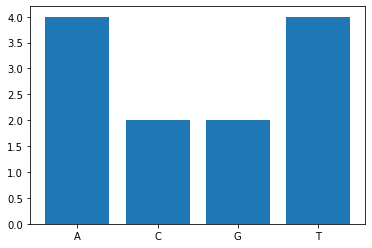

In [7]:
# sequence manipulation
# convert to string first

import biotite.sequence as seq

dna = seq.NucleotideSequence("ATGATCTCGTAA")

# find position of base or nucleotides
str(dna).find("A")

# count freq of nucleotide
str(dna).count("G")

dna_freq = dna.get_symbol_frequency()

# searching for subseq
sub_seq = seq.NucleotideSequence("GAT")
print(seq.find_subsequence(dna, sub_seq))

# find the occurrence of a nucleotide in sequence
print(seq.find_symbol(dna, "G"))
print(seq.find_symbol_first(dna, "G"))
print(seq.find_symbol_last(dna, "G"))

# plot of nucleotide frequency / count 
import matplotlib.pyplot as plt
plt.bar(dna_freq.keys(), dna_freq.values())


# transcription 
# dna to mRNA


# translate
protein = dna.translate()
protein = dna.translate(complete=True)
print(protein)

# amino acids in codontable
# official NCBI
# print(seq.CodonTable.load(1))

# NCBI biotite
# print(seq.CodonTable.default_table())


# search for the amino acid combination
table = seq.CodonTable.default_table()
type(table)
table['GAA']
table['E']


# check for codon table of other species
# for bacterial genome
bacterial_tb = seq.CodonTable.load(11)
# print(bacterial_tb)

# for yeast mitochondrial 
# using name
yeast_tb = seq.CodonTable.load("Yeast Mitochondrial")
# print(yeast_tb)



ITTITE
ITTITE
MITTITE
-ITTITE
Score 28
Recalc Score 28
Sequence Identity 1.0
ATCTCGTA
ATCTCGTA
ATGATCTCGTAA
AT---CTCGTAG
ATGATCTCGTAA
A---TCTCGTAG
ATGATCTCGTAA
---ATCTCGTAG
Score 6
Recalc Score 6
Sequence Identity 0.6666666666666666


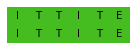

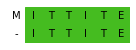

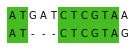

In [8]:
# global alignment - optimisation that forces the alignment to span the entire length of all query sequences

# local alignment: 
# local alignments identify regions of similarity within long sequences that are often widely divergent overall
# local alignments are often preferable, but can be more difficult to calculate because of the additional challenge of identifying the regions of similarity

# biotite align
# function align_optimal()
# performs an optimal global alignment using Needleman-Wunsch algorithm
# performs an optimal local alignment using Smith-Waterman algorithm

import biotite.sequence.align as align

# method
# dir(align)

# create our sub matrix
# standard submatrix
n_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()
# print(n_matrix)

p_matrix = align.SubstitutionMatrix.std_protein_matrix()
# print(p_matrix)

# load matrix from internal database
alph = seq.ProteinSequence.alphabet
matrix_bl50 = align.SubstitutionMatrix(alph, alph, "BLOSUM50")
# print(matrix_bl50)

pseq1 = seq.ProteinSequence("MITTITE")
pseq2 = seq.ProteinSequence("ITTITE")


# local alignment
alignments = align.align_optimal(pseq1, pseq2, p_matrix, local=True)

for a in alignments:
	print(a)


gl_alignments = align.align_optimal(pseq1, pseq2, p_matrix, local=False)

for a in gl_alignments:
	print(a)


import biotite.sequence.graphics as graphics

# local alignment visualisation
fig, ax = plt.subplots(figsize=(2.0, 0.8))
graphics.plot_alignment_similarity_based(
	ax, alignments[0], matrix=p_matrix, symbols_per_line=len(alignments[0])
)
fig.tight_layout()

# global alignment visualisation
fig, ax = plt.subplots(figsize=(2.0, 0.8))
graphics.plot_alignment_similarity_based(
	ax, gl_alignments[0], matrix=p_matrix, symbols_per_line=len(gl_alignments[0])
)
fig.tight_layout()

# alignment score
loc_alignments = alignments[0]
print("Score", loc_alignments.score)
print("Recalc Score", align.score(loc_alignments, matrix=p_matrix))
print("Sequence Identity", align.get_sequence_identity(loc_alignments))

# Nucleotide sequence alignment
dna_seq1 = seq.NucleotideSequence("ATGATCTCGTAA")
dna_seq2 = seq.NucleotideSequence("ATCTCGTAG")

# Local alignment of nucleotides
dna_alignments = align.align_optimal(dna_seq1, dna_seq2, n_matrix, local=True)
for a in dna_alignments:
	print(a)

# global alignment of nucleotides
dna_glb_alignments = align.align_optimal(dna_seq1, dna_seq2, n_matrix, local=False)
for a in dna_glb_alignments:
	print(a)


# global alignment of nucleotides
fig, ax = plt.subplots(figsize=(2.0, 0.8))
graphics.plot_alignment_similarity_based(
	ax, dna_glb_alignments[0], matrix=n_matrix, symbols_per_line=len(dna_glb_alignments[0])
)
fig.tight_layout()

# alignment score for nucleotides global alignment
glob_alignments = dna_glb_alignments[0]
print("Score", glob_alignments.score)
print("Recalc Score", align.score(glob_alignments, matrix=n_matrix))
print("Sequence Identity", align.get_sequence_identity(glob_alignments))

In [12]:
import biotite.sequence.io.fasta as fasta

dir(fasta)

# read fasta file including fasta header
file = fasta.FastaFile()
file.read("DNAToolkit/Examples/ebola_sequence.fasta")

# only sequence without fasta header
ebola_sequence = fasta.get_sequence(file)
# print(ebola_sequence)

# reading genbank file
import biotite.sequence.io.genbank as gb

dir(gb)

gfile = gb.GenBankFile()
gfile.read("DNAToolkit/Examples/ebola_sequence.gb")
print(gfile)

ebola_seq = gb.get_annotation(gfile)
print(ebola_seq)

# read/downloading using the ID

LOCUS       KU182909               18959 bp    cRNA    linear   VRL 22-DEC-2015
DEFINITION  Ebola virus isolate Ebola virus/H.
            sapiens-tc/COD/1995/Kikwit-9510622, complete genome.
ACCESSION   KU182909
VERSION     KU182909.1
DBLINK      BioProject: PRJNA242964
KEYWORDS    .
SOURCE      Ebola virus (EBOV)
  ORGANISM  Ebola virus
            Viruses; Riboviria; Orthornavirae; Negarnaviricota;
            Haploviricotina; Monjiviricetes; Mononegavirales; Filoviridae;
            Ebolavirus.
REFERENCE   1  (bases 1 to 18959)
  AUTHORS   Das,S.R., Shabman,R., Halpin,R.A., Akopov,A., Fedorova,N., Puri,V.,
            Stockwell,T., Amedeo,P., Bishop,B., Katzel,D., Schobel,S.,
            Shrivastava,S., Brasel,T., Yun,N., Paessler,S., Dowling,W. and
            Barrett,A.
  TITLE     Direct Submission
  JOURNAL   Submitted (24-NOV-2015) J. Craig Venter Institute, 9704 Medical
            Center Drive, Rockville, MD 20850, USA
COMMENT     This work was supported by the National Inst

In [13]:
# working with DB

import biotite.database.entrez as entrez

dir(entrez)

# get our database name
entrez.get_database_name("Nucleotide")
entrez.get_database_name("Protein")

# search
# database => query => search => ID => fetch

# making a simple query
myquery = entrez.SimpleQuery("Covid19")

# searching with query
ans_id = entrez.search(myquery, "nucleotide", number=10)
print(ans_id)

# downloading our file
file_path = entrez.fetch("2105187405", "myresult_dir", suffix ='fa', db_name ="nuccore", ret_type="fasta")

file_path

# Reading and downloading 
# id KU182909.1

file_path2 = entrez.fetch("KU182909.1", "myresult_dir", suffix ='fa', db_name ="nuccore", ret_type="fasta")

import biotite.sequence.io.fasta as fasta

file2 = fasta.FastaFile()
file2.read(file_path2)

for h, st in file2.items():
	print(h)
	print(st)


['2123541081', '2123540882', '2123540881', '2123540880', '2123540879', '2123540878', '2123540877', '2123540876', '2123540875', '2123540874']
KU182909.1 Ebola virus isolate Ebola virus/H. sapiens-tc/COD/1995/Kikwit-9510622, complete genome
CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTATGAGGAAGATTAATAATTTTCCTCTCATTGAAATTTATATCGGAATTTAAATTGAAATTGTTACTGTAATCACACCTGGTTTGTTTCAGAGCCACATCACAAAGATAGAGAACAACCTAGGTCTCTGAAGGGAGCAAGGGCATCAGTGTGCTCAGTTGAAAATCCCTTGTCAACATCTAGGTCTTATCACATCACAAGTCCCACCTCAGACTCTGCAGGGTGATCCAACAACCTTAATAGAAACATTATTGTTAAAGGACAGCATTAGTTCACAGTCAAACAAGCAAGATTGAGAATTAACCTTGGTTTTGAACTTGAATACTTAGAGGATTGGAGATTCAACAACCCTAAAGCTTGGGGTAAAACATTGGAAATAGTTAAAAGACAAATTGCTCGGAATCACAACATTCCGAGTATGGATTCTCGTCCTCAGAAAGTCTGGATGACGCCGAGTCTCACTGAATCTGACATGGATTACCACAAGATCTTGACAGCAGGTCTGTCCGTTCAACAGGGGATTGTTCGGCAAAGAGTCATCCCAGTGTATCAAGTAAACAATCTTGAGGAGATTTGCCAACTTATCATACAGGCCTTTGAAGCAGGTGTTGATTTTCAAGAGAGTGCGGACAGTTTCCTTCTCATGCTTTGTCTTCATCATGCGTACCAGGGAGATTACAAACTTTTCTTGGAAAGTGGCGCAGTCAAGT

In [14]:
# working with 3D structures

# fetching our 3D structure file

import biotite.database.rcsb as rcsb 

dir(rcsb)

pdb_file_path = rcsb.fetch("4ZS6", "pdb", "mypdb_dir")

print(pdb_file_path)

# multiple files
pdb_file_path = rcsb.fetch(["4ZS6", "6LU7"], "pdb", "mypdb_dir")


# reading 3D pdb files
# pdb, cif, npz, xtc, mmt
import biotite.structure.io.pdb as pdb

dir(pdb)

file_reader = pdb.PDBFile()
file_reader.read("mypdb_dir/4ZS6.pdb")
# print(file_reader)

protein_struc = file_reader.get_structure()
# print(protein_struc)


# shape and coord
# print("Shape", protein_struc.shape)
# print("Coordinates", protein_struc.coord)




mypdb_dir\4ZS6.pdb


Tree: ((Apple:2.0,Pear:2.0):2.0,((Orange:1.0,Lemon:1.0):2.0,Banana:3.0):1.0):0.0;
Tree w/o distances: ((Apple,Pear),((Orange,Lemon),Banana));
Distance Apple-Banana: 8.0


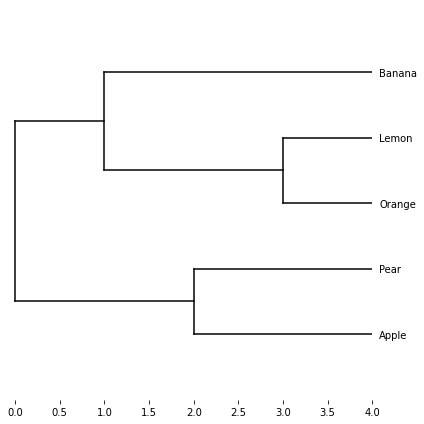

In [15]:
# Phylogenetics with biotite
import biotite.sequence.phylo as phylo

dir(phylo)


# the reference objects
fruits = ["Apple", "Pear", "Orange", "Lemon", "Banana"]
# create nodes
apple  = phylo.TreeNode(index = fruits.index("Apple"))
pear   = phylo.TreeNode(index = fruits.index("Pear"))
orange = phylo.TreeNode(index = fruits.index("Orange"))
lemon  = phylo.TreeNode(index = fruits.index("Lemon"))
banana = phylo.TreeNode(index = fruits.index("Banana"))
intermediate1 = phylo.TreeNode(
	children = (apple, pear), distances = (2.0, 2.0)
)
intermediate2 = phylo.TreeNode((orange, lemon), (1.0, 1.0))
intermediate3 = phylo.TreeNode((intermediate2, banana), (2.0, 3.0))
root = phylo.TreeNode((intermediate1, intermediate3), (2.0, 1.0))

# create tree from root node
tree = phylo.Tree(root = root)
# trees can be converted into Newick notation
print("Tree:", tree.to_newick(labels = fruits))
# distances can be omitted
print(
	"Tree w/o distances:", 
	tree.to_newick(labels = fruits, include_distance = False)
)
# distances can be measured
distance = tree.get_distance(fruits.index("Apple"), fruits.index("Banana"))
print("Distance Apple-Banana:", distance)

# plot a phylo tree
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics

fig, ax = plt.subplots(figsize = (6.0, 6.0))
graphics.plot_dendrogram(ax, tree, labels=fruits)
fig.tight_layout()

In [16]:
# simple app

import biotite.application

dir(biotite.application)

# BLAST
import biotite.application.blast as blast

import biotite.sequence as seq
mini_protein = seq.ProteinSequence("NLYIQWLKDGGPSSGRPPPS")

# initialise the app and created state
app = blast.BlastWebApp("blastp" , mini_protein) 
app.start() # task
app.join() # make accessible

alignments = app.get_alignments()
best_alignments = alignments[0] # print best alignments

print("Score", best_alignments.score)
print("E-value", best.alignments.e_value)
print("HIT_ID", best_alignments.hit_id)
print("HIT NAME", best_alignments.hit_definition)




Score 101


NameError: name 'best' is not defined

In [ ]:
# final project in biotite

import biotite
import biotite.sequence as seq

dir(biotite)

# create DNA sequence
dna = seq.NucleotideSequence("ATCTAGGAC")

# check for the alphabet in the nucleotide sequence
dna.get_alphabet()

# nucleotide frequencies in the string
dna_freq = dna.get_symbol_frequency()
print(f"Nucleotide frequencies: {dna_freq}")

# plot it
import matplotlib.pyplot as plt
import biotite.sequence.graphics as graphics
plt.bar(dna_freq.keys(), dna_freq.values())




# complement
print(f"DNA complement: {dna.complement()}")
# translation
protein = dna.translate(complete=True)
print(protein)

# creating protein sequence
protein_seq = seq.ProteinSequence("MIT")
print(protein_seq)

# protein: AA 1letter -> 3letter code
for sym in protein_seq:
	print(seq.ProteinSequence.convert_letter_1to3(sym))




# sequence alignments
seq1 = seq.ProteinSequence("MITITET")
seq2 = seq.ProteinSequence("ITITET")

import biotite.sequence.align as align
dir(align)

# sub matrix
p_matrix = align.SubstitutionMatrix.std_protein_matrix()
n_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()

loc_alignments = align.align_optimal(seq1, seq2, p_matrix, local=True)

glb_alignments = align.align_optimal(seq1, seq2, p_matrix, local=False)

import biotite.sequence.graphics as graphics
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (2.0, 0.8))
graphics.plot_alignment_similarity_based(ax, glb_alignments[0], matrix=p_matrix, symbols_per_line=len(glb_alignments[0]))
fig.tight_layout()

# alignment score
# seq identity
print("Score", glb_alignments[0].score)
print("Seq identity", align.get_sequence_identity(glb_alignments[0]))








In [ ]:
# working with DB
import biotite.database.entrez as entrez
dir(entrez)
# get DB name
entrez.get_database_name("Nucleotide")
# get DB for protein
entrez.get_database_name("Protein")

# download and parse protein sequences of covid and Mers
covid_file_path = entrez.fetch("MN908947", "myresult_dir", suffix="fa", db_name="nuccore", ret_type="fasta")
mers_file_path = entrez.fetch("NC_019843.3", "myresult_dir", suffix="fa", db_name="nuccore", ret_type="fasta")

# reading FASTA file
import biotite.sequence.io.fasta as fasta

# methods/attributes
dir(fasta)

c_file = fasta.FastaFile()
c_file.read(covid_file_path)

m_file = fasta.FastaFile()
m_file.read(mers_file_path)

for header, s in c_file.items():
	print(header)
	# print(s)
	covid_seq = seq.NucleotideSequence(s)

for header, s in m_file.items():
	mers_seq = seq.NucleotideSequence(s)




# len of seqs
print("Len of Covid", len(covid_seq))
print("Len of MERS", len(mers_seq))

print("Freq of N in Covid: ", covid_seq.get_symbol_frequency())
print("Freq of N in MERS: ", mers_seq.get_symbol_frequency())


# gc content of DNA
def gc_content(sequence):
	result = float(str(sequence).count('G') + str(sequence).count('C'))/len(sequence) * 100
	return result

print(f"GC content Covid: {gc_content(covid_seq)}; GC content MERS: {gc_content(covid_seq)}")

# plot
freq_covid = covid_seq.get_symbol_frequency()
freq_mers = mers_seq.get_symbol_frequency()
plt.bar(freq_covid.keys(), freq_covid.values())




# Sequence alignment btw Covid and MERS
mini_covid_seq = covid_seq[0:200]
mini_mers_seq = mers_seq[0:200]

# print(n_matrix)

c_alignments = align.align_optimal(mini_covid_seq, mini_mers_seq, n_matrix, gap_penalty = (-10, -1), terminal_penalty=False)

# for i in c_alignments:
# 	print(i)

fig = plt.figure(figsize=(8.0, 2.5))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
	ax, c_alignments[0], matrix=n_matrix, labels=['Covid', 'Mers'], 
	show_numbers = True, show_line_position = True
)
fig.tight_layout()
plt.show()



# how identical
c_alignments[0].score
# seq_identity
align.get_sequence_identity(c_alignments[0])

# NeatBio

In [ ]:
import neatbio as nt

# methods / attributes
dir(nt)

# create a DNA sequence
seq1 = nt.Sequence("ATCATGCT")
type(seq1)

# complement
seq1.complement()

# reverse complement
seq1.reverse_complement()



# protein synthesis
seq1.transcribe()
mrna = seq1.transcribe()


# translation
mrna.translate()
seq1.translate()

# back transcribe
mrna.back_transcribe()

# back translation
from neatbio.sequtils import back_translate
back_translate("IM")




# dna composition

# GC content
seq1.gc

seq1.at

# GC frequency / count
seq1.gc_frequency()

seq1.at_frequency()

# full GC content
from neatbio.sequtils import gc_content, at_content

gc_content(seq1)
at_content(seq1)

# freq of nucleotides
seq_freq = seq1.get_symbol_frequency()

# visualisation
import matplotlib.pyplot as plt

plt.bar(seq_freq.keys(), seq_freq.values())


# count of N
seq1.count("G")

# find position of nucleotide
seq1.index("G")

# randomise
seq1.randomize()
seq1

# randomly generate N length seq
seq2 = nt.Sequence("ATGCATCG")
seq2.random_gen(100)

p1 = nt.ProteinSeq("MITIVF")

dir(p1)

# back translate
p1.back_translate()

seq4 = nt.Sequence("ATGATAACTATAGTTTTT")
seq4.translate()

# get the aromacity
# p1.aromaticity()

# # molar extinction coefficient
# p1.molar_coeff()




# amino acid percentage
# p1.get_amino_acid_percentage()


# convert 1 letter to 3 letter
from neatbio.sequtils import convert_3to1, convert_1to3, get_acid_name

convert_1to3("MITIVF")
convert_1to3('MI*TIVF', allow_stop = True)

convert_3to1('MetIleThrIleValPhe')

get_acid_name("Met")
get_acid_name("MetIleThrIleValPhe")

# dotplot
import neatbio.sequtils as utils
seq1 = nt.Sequence("ATGCTG")
seq2 = nt.Sequence("ATGCAG")

utils.dotplot(seq1, seq2)

# checking similarity with distance
dir(utils)
# hamming distance
utils.hamming_distance(seq1, seq2)
# lev distance
utils.levenshtein_distance(seq1, seq2)
# minimum_edit distance
utils.minimum_edit_distance(seq1, seq2)


# Kmers
# get Kmers of k2
utils.count_kmers(seq1, k=2)
# get kmers of k3
utils.count_kmers(seq1, k=3)

utils.kmer_distance(seq1, seq2)


# reading a FASTA file
import neatbio as nt
my_seq_file = nt.read_fasta("sequence.fasta")
my_seq_file['header']
my_seq = nt.Sequence(my_seq_file['seqRecord'])
my_seq_translate = my_seq.translate()